In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Big_Mart_Sales_Figure.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.shape

(8523, 12)

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.isna().sum()/len(df)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [9]:
#Unique values are there in this column
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [10]:
df['Item_Identifier'].nunique()

1559

In [13]:
def fix_identifier(x):
  return x[0:2]

In [14]:
fix_identifier('ABCDE')
fix_identifier('DRC01')

'DR'

In [17]:
#data column preprocessing
#apply() - it can be used to apply a user defined function on a given data column

df['Item_Identifier'] = df['Item_Identifier'].apply(fix_identifier)

In [18]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
df['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [20]:
df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [21]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
def fix_fat_content(x):
  if x in ['Low Fat' , 'low fat', 'LF']:
    return 'Low Fat'
  elif x in ['Regular', 'reg']:
    return 'Regular'
  else:
    return 'Other'

df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(fix_fat_content)

In [24]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [25]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [27]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
df['Item_Type'].nunique()

16

In [30]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [31]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [34]:
def fix_out_ide(outlet):
  return int(outlet[-2:])

fix_out_ide('OUT046')

46

In [36]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].apply(fix_out_ide)

In [38]:
df['Outlet_Establishment_Year'] = 2024 - df['Outlet_Establishment_Year']

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,49,25,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,18,15,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,49,25,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,26,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,13,37,High,Tier 3,Supermarket Type1,994.7052


In [40]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [43]:
#select only numerical column to perform analysis

df_number = df.select_dtypes(include='number')
df_number.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,49,25,3735.1380
1,5.92,0.019278,48.2692,18,15,443.4228
2,17.50,0.016760,141.6180,49,25,2097.2700
3,19.20,0.000000,182.0950,10,26,732.3800
4,8.93,0.000000,53.8614,13,37,994.7052


* Univariate analysis on numerical data

In [52]:
#univariate analysis on Item_weight
df_number['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

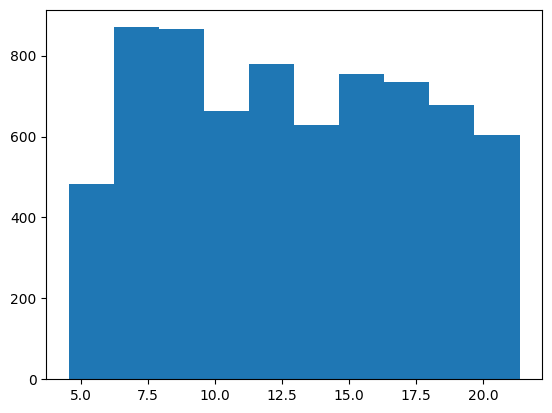

In [54]:
#Histogram plot on item weight
import matplotlib.pyplot as plt      #python library for data plotting
plt.hist(df_number['Item_Weight'])
plt.show()

In [55]:
#Univariate Analysis on item visibility
df_number['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

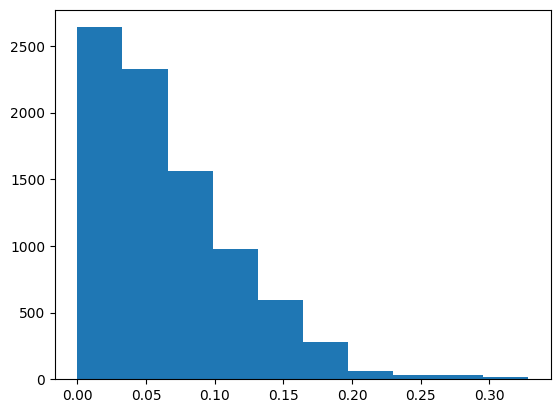

In [56]:
plt.hist(df_number['Item_Visibility'])
plt.show()

In [57]:
df_number['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

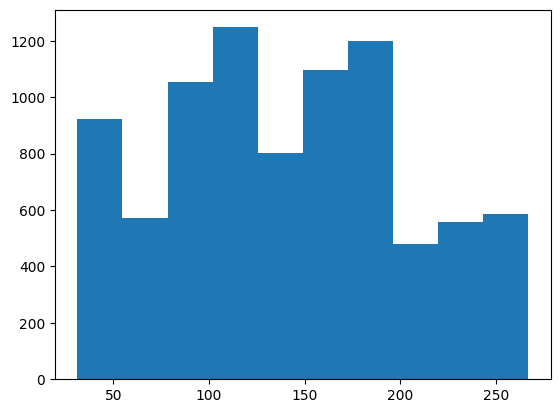

In [58]:
plt.hist(df_number['Item_MRP'])
plt.show()

In [61]:
#Outlet identifier is numerical and categorical
outlet_product_sold = df_number['Outlet_Identifier'].value_counts()
outlet_product_sold

Outlet_Identifier
27    935
13    932
49    930
46    930
35    930
45    929
18    928
17    926
10    555
19    528
Name: count, dtype: int64

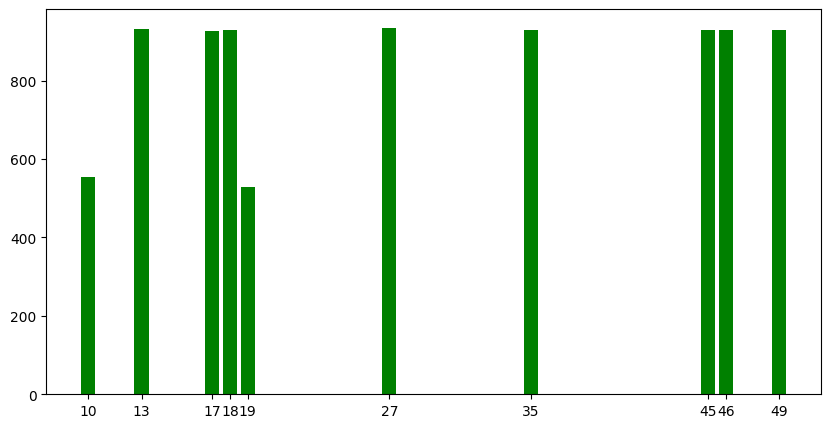

In [70]:
#bar plot the outlet identifier counts
#plt.bar(x,y)

plt.figure(figsize=(10,5))
plt.bar(outlet_product_sold.index , outlet_product_sold.values , color='green')
plt.xticks(outlet_product_sold.index , rotation = 0)
plt.show()

In [71]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean       26.168133
std         8.371760
min        15.000000
25%        20.000000
50%        25.000000
75%        37.000000
max        39.000000
Name: Outlet_Establishment_Year, dtype: float64

In [72]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

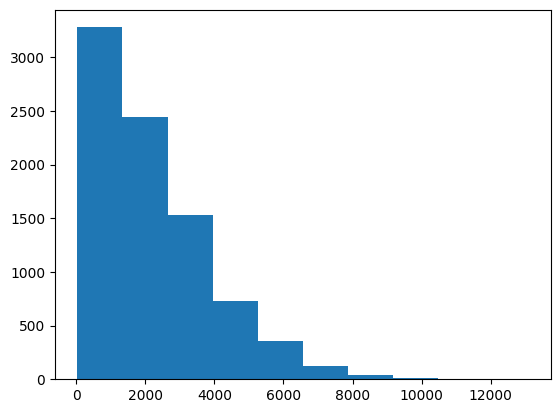

In [73]:
plt.hist(df['Item_Outlet_Sales'])
plt.show()

* Bivariate/ Multivariate analysis on numerical data

In [46]:
#calculate correlation
df_number.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.009365,0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.111788,0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.004061,-0.005020,0.567574
Outlet_Identifier,-0.009365,-0.111788,0.004061,1.000000,-0.141465,0.152660
Outlet_Establishment_Year,0.011588,0.074834,-0.005020,-0.141465,1.000000,0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,0.152660,0.049135,1.000000


In [48]:
x1 = df['Item_MRP']
x2 = df['Item_Outlet_Sales']

n1 = ((x1 - x1.mean()) * (x2 - x2.mean())).sum()
d1 = (((x1 - x1.mean())**2).sum() * ((x2 - x2.mean())**2).sum())**0.5
c1 = n1/d1
print(c1)

0.5675744466569193


<Axes: >

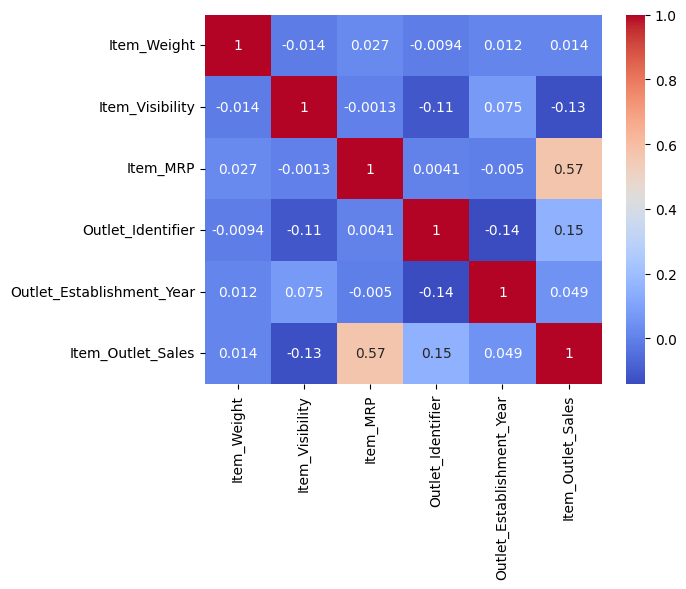

In [50]:
#Visualisation to understand corealtion though heatmap

import seaborn as sns

sns.heatmap(df_number.corr(), annot=True , cmap= 'coolwarm')

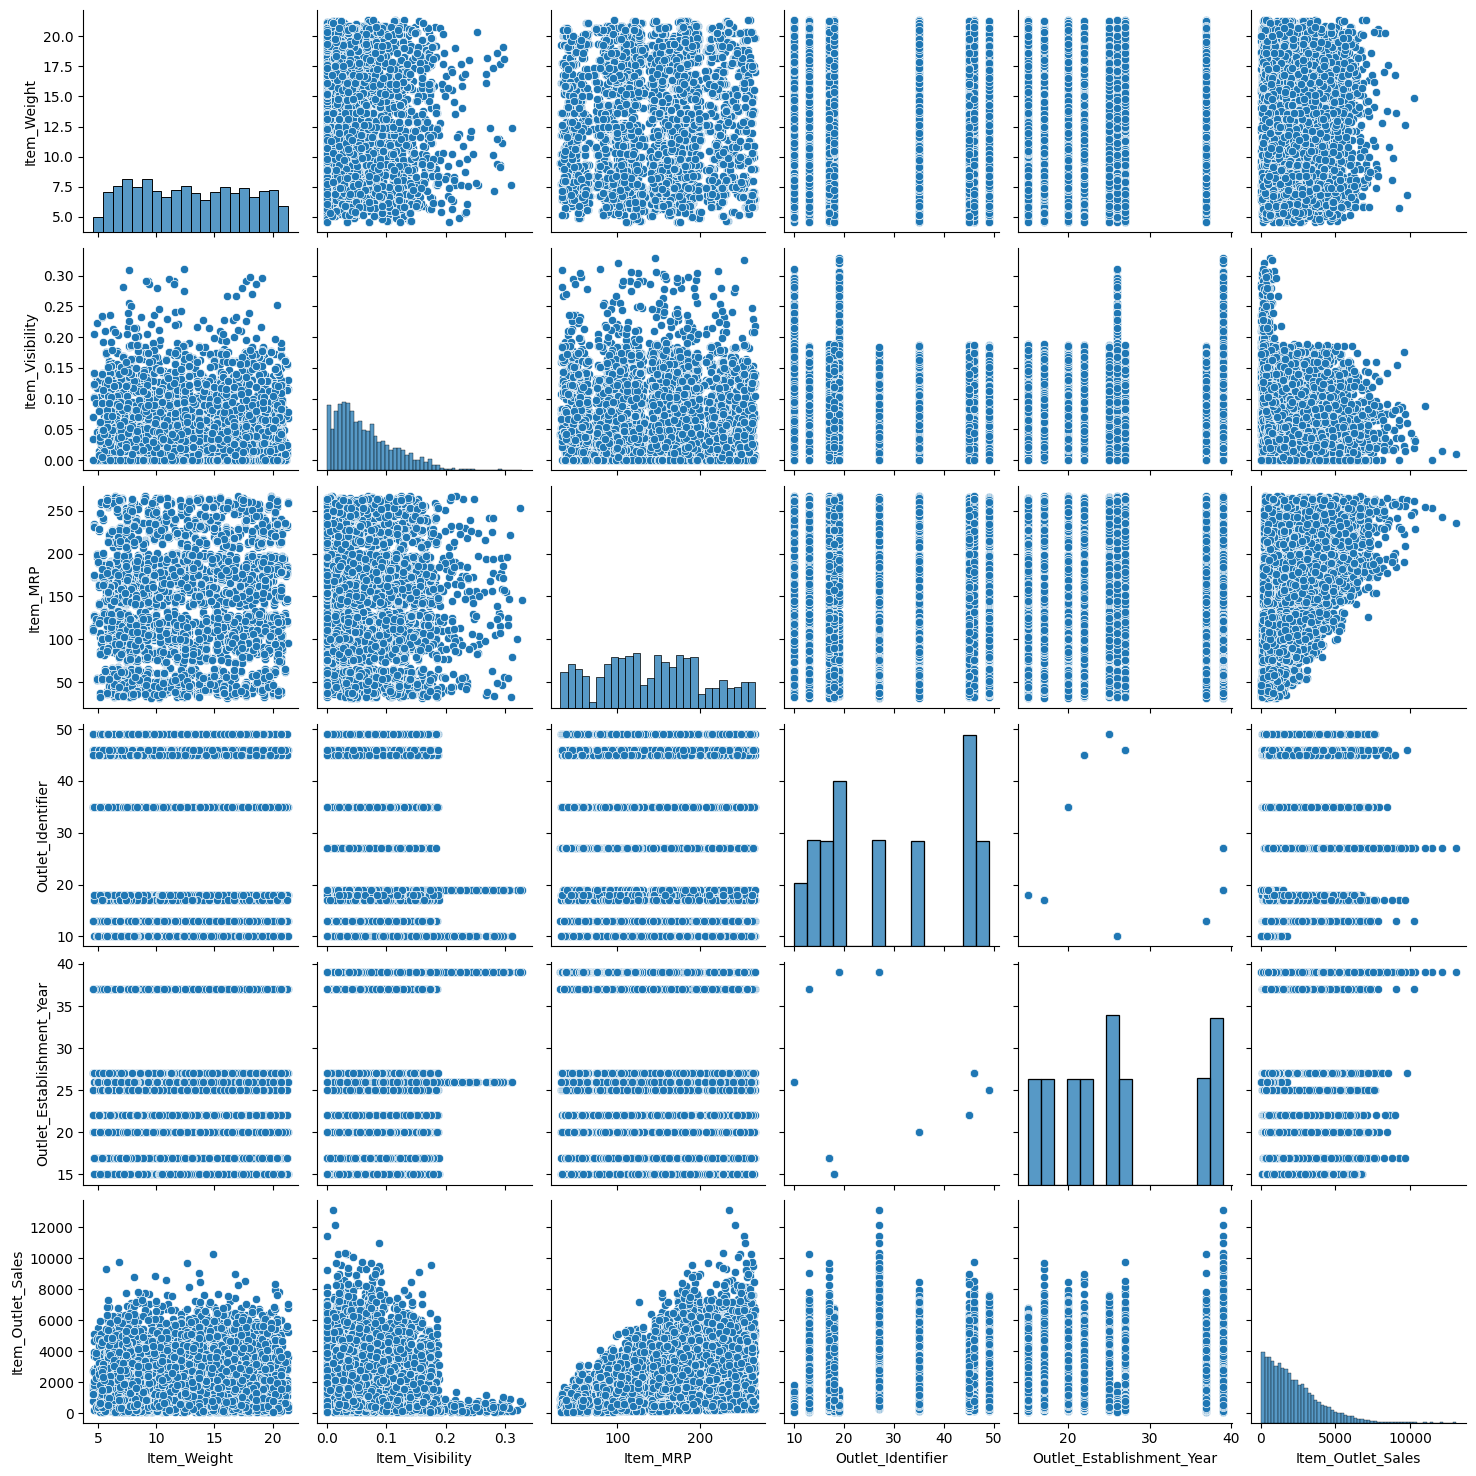

In [51]:
#pairplot to identify patterns within different data columns

sns.pairplot(df_number)

**Non-Numerical Data**

In [81]:
df_object = df.select_dtypes(include='object')
df_object['Item_Outlet_Sales'] = df['Item_Outlet_Sales']
df_object.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,732.3800
4,NC,Low Fat,Household,High,Tier 3,Supermarket Type1,994.7052


* Univariate Analysis on non-numerical data

In [82]:
df['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

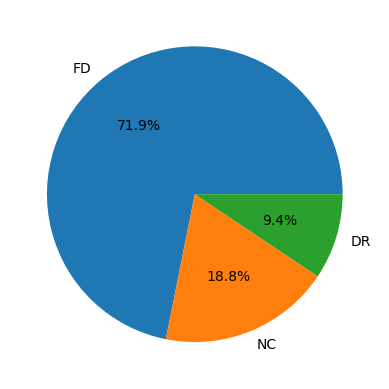

In [83]:
plt.pie(df['Item_Identifier'].value_counts(), labels=df['Item_Identifier'].value_counts().index , autopct='%1.1f%%')

plt.show()

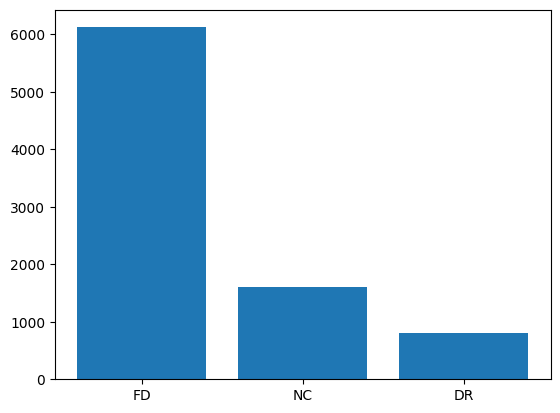

In [84]:
plt.bar(df['Item_Identifier'].value_counts().index , df['Item_Identifier'].value_counts().values)
plt.show()

In [86]:
df_object['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

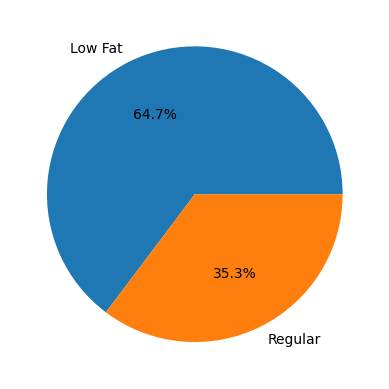

In [88]:
plt.pie(df_object['Item_Fat_Content'].value_counts(),
        labels=df_object['Item_Fat_Content'].value_counts().index ,
        autopct='%1.1f%%')

plt.show()

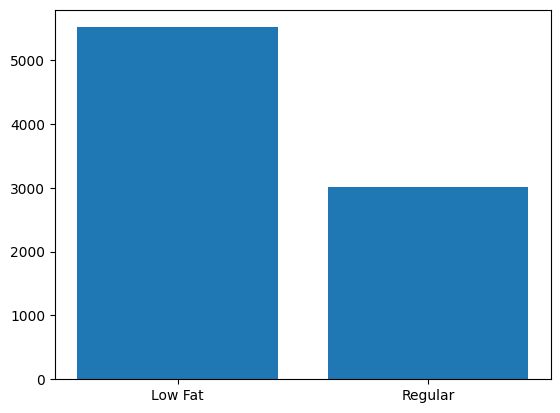

In [89]:
plt.bar(df_object['Item_Fat_Content'].value_counts().index , df_object['Item_Fat_Content'].value_counts().values)
plt.show()

In [90]:
df_object['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

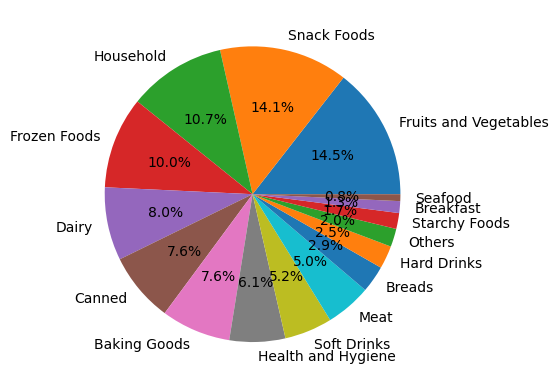

In [91]:
plt.pie(df_object['Item_Type'].value_counts(),
        labels=df_object['Item_Type'].value_counts().index ,
        autopct='%1.1f%%')

plt.show()

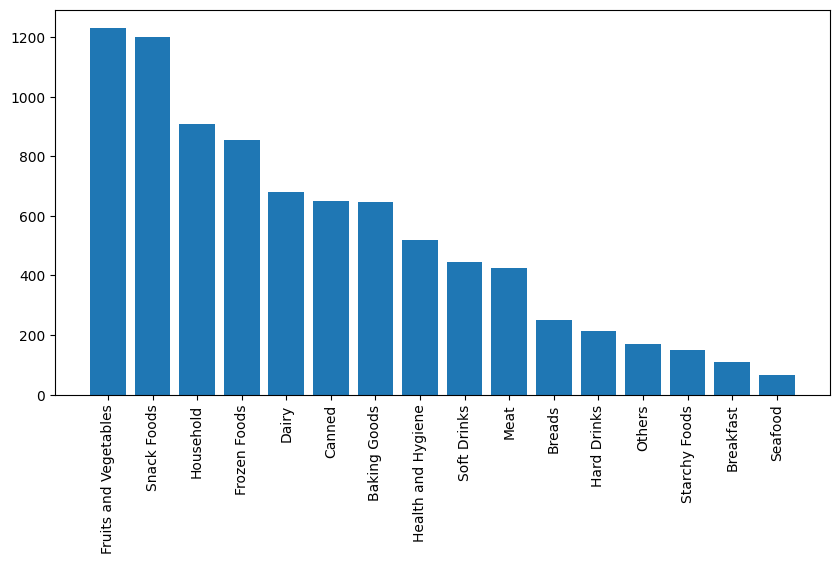

In [94]:
plt.figure(figsize=(10,5))
plt.bar(df_object['Item_Type'].value_counts().index , df_object['Item_Type'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

In [95]:
df_object['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

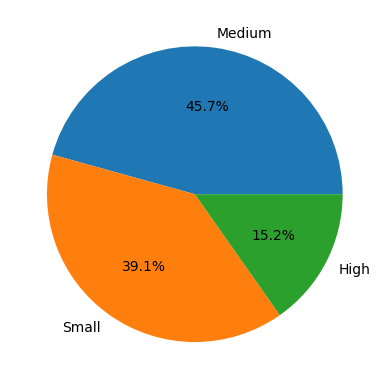

In [96]:
plt.pie(df_object['Outlet_Size'].value_counts(),
        labels=df_object['Outlet_Size'].value_counts().index ,
        autopct='%1.1f%%')

plt.show()

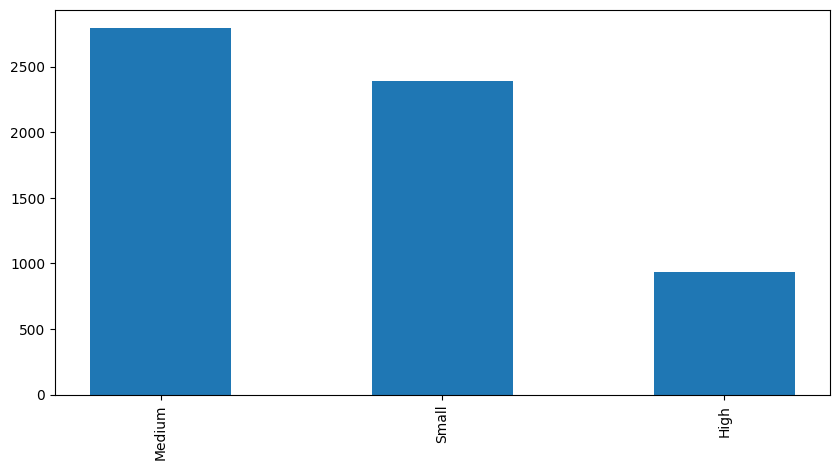

In [98]:
plt.figure(figsize=(10,5))
plt.bar(df_object['Outlet_Size'].value_counts().index , df_object['Outlet_Size'].value_counts().values,
        width = 0.5)
plt.xticks(rotation=90)
plt.show()

In [99]:
df_object['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

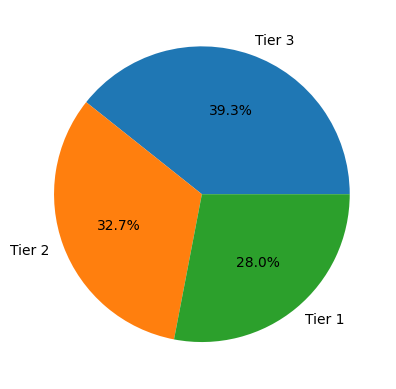

In [100]:
plt.pie(df_object['Outlet_Location_Type'].value_counts(),
        labels=df_object['Outlet_Location_Type'].value_counts().index ,
        autopct='%1.1f%%')

plt.show()

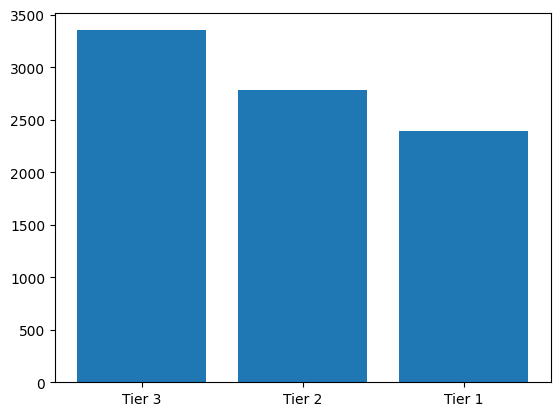

In [101]:
plt.bar(df_object['Outlet_Location_Type'].value_counts().index , df_object['Outlet_Location_Type'].value_counts().values)
plt.show()

In [102]:
df_object.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [103]:
df_object['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

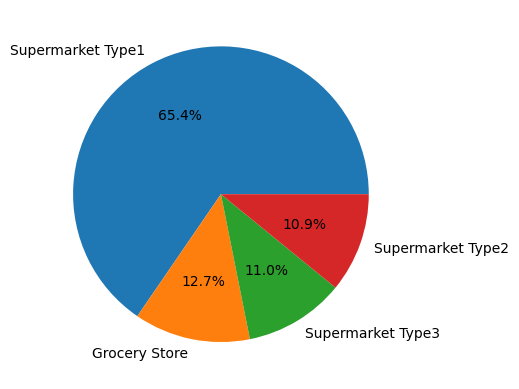

In [104]:
plt.pie(df_object['Outlet_Type'].value_counts(),
        labels=df_object['Outlet_Type'].value_counts().index ,
        autopct='%1.1f%%')

plt.show()

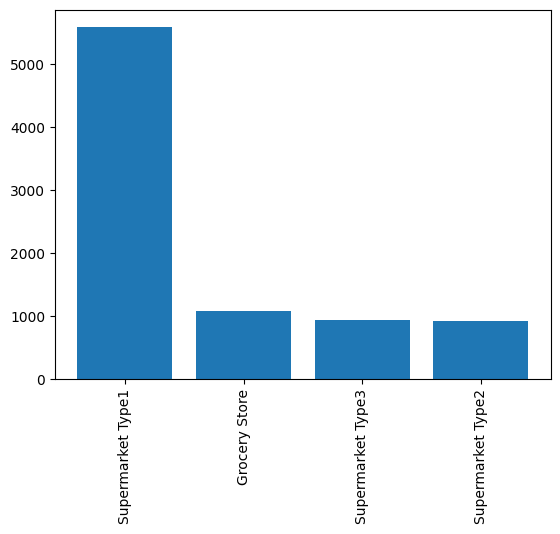

In [106]:
plt.bar(df_object['Outlet_Type'].value_counts().index , df_object['Outlet_Type'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

* Bibariate/Multivariate analysis on non-numerical data

In [107]:
df_object.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,732.3800
4,NC,Low Fat,Household,High,Tier 3,Supermarket Type1,994.7052


In [111]:
ide_fat_count = pd.crosstab(df_object['Item_Identifier'] , df_object['Item_Fat_Content'])
ide_fat_count

Item_Fat_Content,Low Fat,Regular
Item_Identifier,,
DR,728,71
FD,3190,2935
NC,1599,0


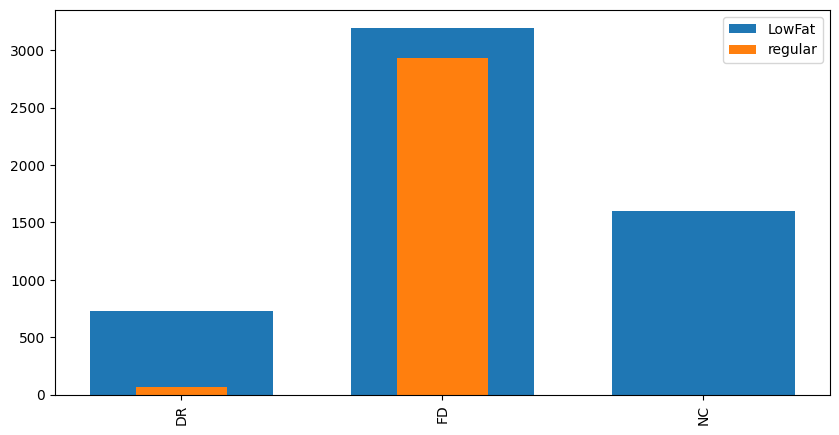

In [116]:
plt.figure(figsize=(10,5))

plt.bar(ide_fat_count.index , ide_fat_count['Low Fat'] , width = 0.7 , label = "LowFat")
plt.bar(ide_fat_count.index , ide_fat_count['Regular'] , width = 0.35 , label = "regular")

plt.legend()
plt.xticks(rotation=90)
plt.show()

In [118]:
item_fat = pd.crosstab(df_object['Item_Type'] , df_object['Item_Fat_Content'])
item_fat

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,329,319
Breads,140,111
Breakfast,41,69
Canned,341,308
Dairy,418,264
Frozen Foods,450,406
Fruits and Vegetables,630,602
Hard Drinks,214,0
Health and Hygiene,520,0


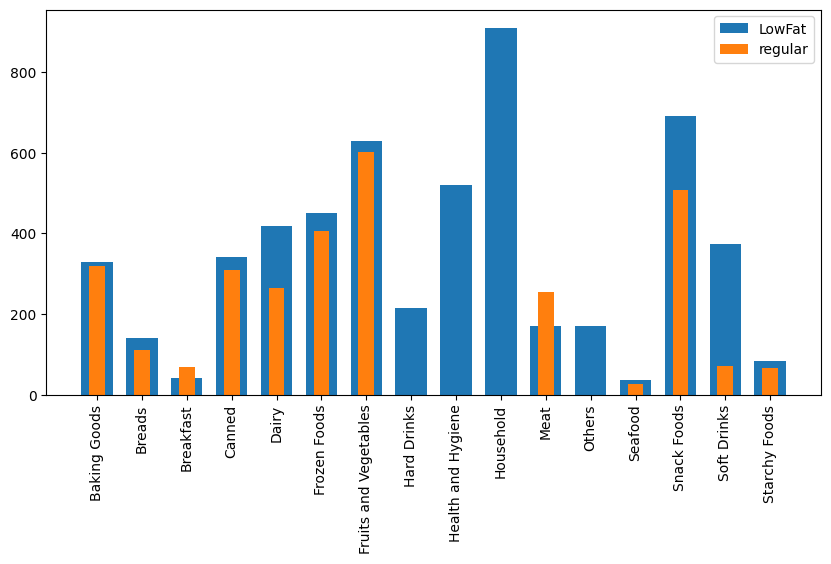

In [120]:
plt.figure(figsize=(10,5))

plt.bar(item_fat.index , item_fat['Low Fat'] , width = 0.7 , label = "LowFat")
plt.bar(item_fat.index , item_fat['Regular'] , width = 0.35 , label = "regular")

plt.legend()
plt.xticks(rotation=90)
plt.show()

In [123]:
outlet_sizes = pd.crosstab(df_object['Outlet_Type'] , df_object['Outlet_Size'])
outlet_sizes

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


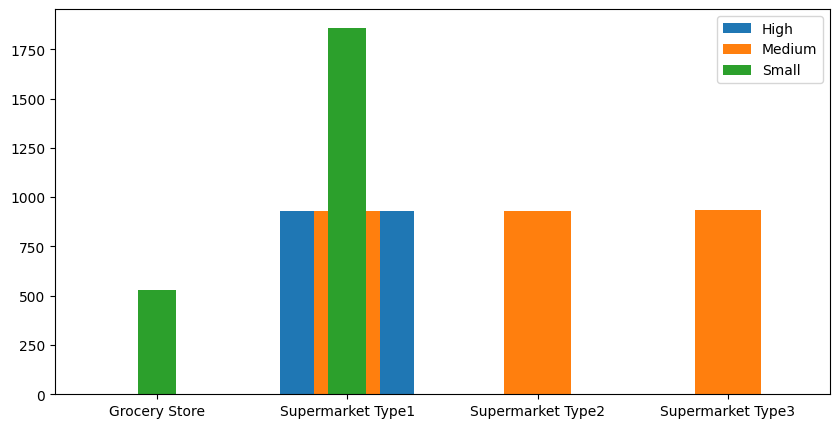

In [126]:
plt.figure(figsize=(10,5))

plt.bar(outlet_sizes.index , outlet_sizes['High'] , width = 0.7 , label = "High")
plt.bar(outlet_sizes.index , outlet_sizes['Medium'] , width = 0.35 , label = "Medium")
plt.bar(outlet_sizes.index , outlet_sizes['Small'] , width = 0.2 , label = "Small")

plt.legend()
plt.show()

In [128]:
#Compare Outlet size with Outlet_Location_Type
out_size_loc_type = pd.crosstab(df_object['Outlet_Size'] , df_object['Outlet_Location_Type'])
out_size_loc_type

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


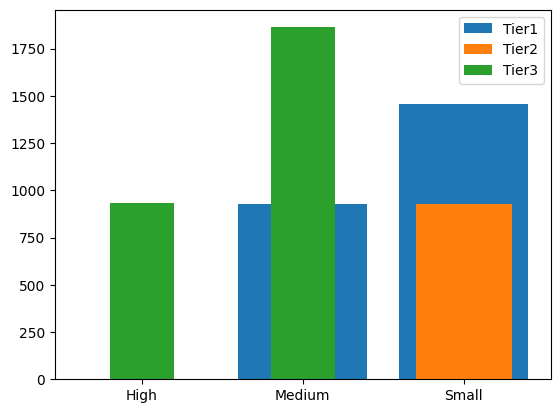

In [131]:
plt.bar(out_size_loc_type.index , out_size_loc_type['Tier 1'] , width = 0.8 , label = 'Tier1')
plt.bar(out_size_loc_type.index , out_size_loc_type['Tier 2'] , width = 0.6  , label = 'Tier2')
plt.bar(out_size_loc_type.index , out_size_loc_type['Tier 3'] , width = 0.4 , label = 'Tier3')

plt.legend()
plt.show()

* Bivariate Analysis between non-numerical and numerical data

In [132]:
df_object.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,732.3800
4,NC,Low Fat,Household,High,Tier 3,Supermarket Type1,994.7052


In [133]:
df_object['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

* groupby()

In [135]:
item_ide_avg_sales = df_object.groupby('Item_Identifier')['Item_Outlet_Sales'].mean()
item_ide_avg_sales

Item_Identifier
DR    1997.333337
FD    2215.354223
NC    2142.721364
Name: Item_Outlet_Sales, dtype: float64

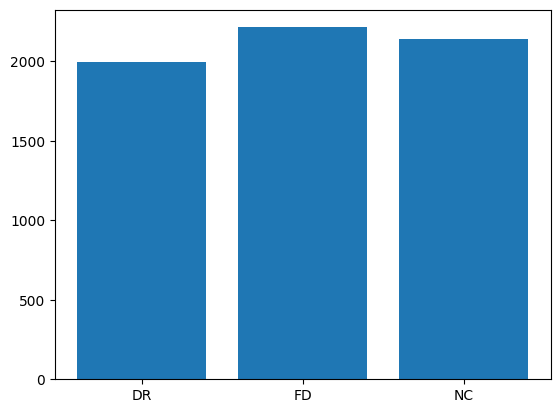

In [136]:
plt.bar(item_ide_avg_sales.index , item_ide_avg_sales.values)
plt.show()

In [137]:
item_ide_total_sales = df_object.groupby('Item_Identifier')['Item_Outlet_Sales'].sum()
item_ide_total_sales

Item_Identifier
DR    1.595869e+06
FD    1.356904e+07
NC    3.426211e+06
Name: Item_Outlet_Sales, dtype: float64

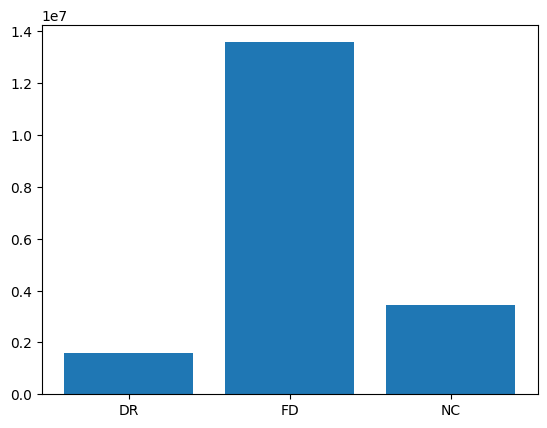

In [138]:
plt.bar(item_ide_total_sales.index , item_ide_total_sales.values)
plt.show()

In [144]:
fat_content_sales = df_object.groupby('Item_Fat_Content')['Item_Outlet_Sales'].agg(['mean','sum'])
fat_content_sales

,mean,sum
Item_Fat_Content,,
Low Fat,2157.711534,1.190409e+07
Regular,2224.561170,6.687031e+06


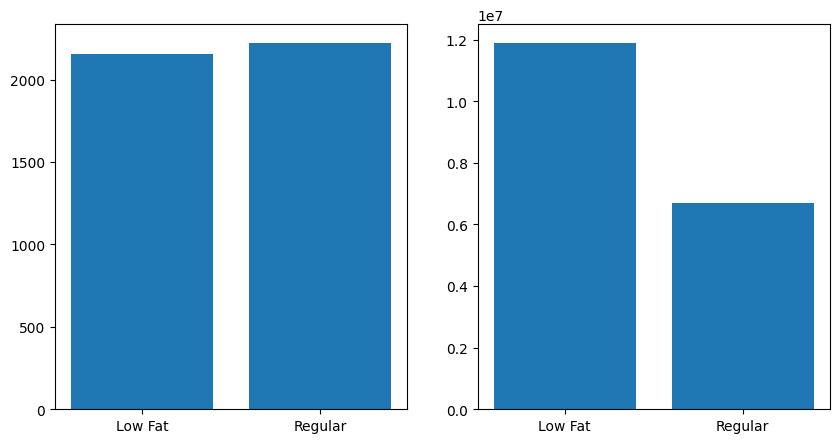

In [145]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.bar(fat_content_sales.index , fat_content_sales['mean'])

plt.subplot(1,2,2)
plt.bar(fat_content_sales.index , fat_content_sales['sum'])

plt.show()

In [146]:
df_object.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,732.3800
4,NC,Low Fat,Household,High,Tier 3,Supermarket Type1,994.7052


In [148]:
#df_object['Item_Outlet_Sales']

In [149]:
#compare average and total sales of each item type

item_type_sales = df_object.groupby('Item_Type')['Item_Outlet_Sales'].agg(['mean','sum'])
item_type_sales

,mean,sum
Item_Type,,
Baking Goods,1952.971207,1.265525e+06
Breads,2204.132226,5.532372e+05
Breakfast,2111.808651,2.322990e+05
Canned,2225.194904,1.444151e+06
Dairy,2232.542597,1.522594e+06
Frozen Foods,2132.867744,1.825735e+06
Fruits and Vegetables,2289.009592,2.820060e+06
Hard Drinks,2139.221622,4.577934e+05
Health and Hygiene,2010.000265,1.045200e+06


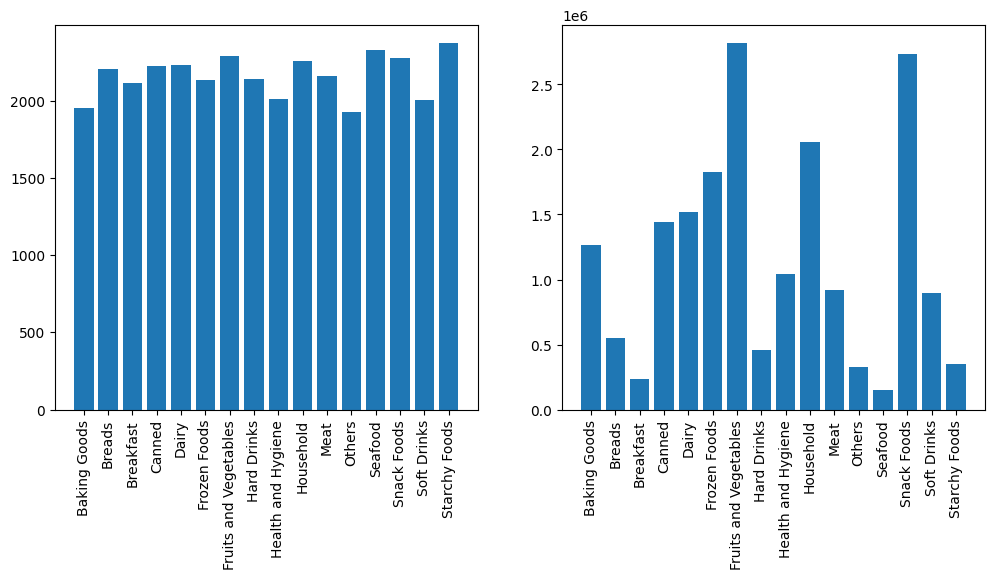

In [152]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.bar(item_type_sales.index , item_type_sales['mean'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.bar(item_type_sales.index , item_type_sales['sum'])
plt.xticks(rotation = 90)

plt.show()

**Missing value Treatment**

In [153]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,49,25,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,18,15,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,49,25,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,26,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,13,37,High,Tier 3,Supermarket Type1,994.7052


In [154]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [155]:
df['Item_Weight'].mean()

12.857645184135976

In [156]:
df.groupby(by='Item_Type')['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [157]:
df.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DR    12.072348
FD    12.832186
NC    13.354532
Name: Item_Weight, dtype: float64

In [158]:
#fillna() - to fill null values

df['Item_Weight'] = df['Item_Weight'].fillna(12.86)

In [159]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [161]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [162]:
pd.crosstab(df['Outlet_Type'] , df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [163]:
pd.crosstab(df['Outlet_Location_Type'] , df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


* We can fill null values in Outlet size based upon outlet location type
  * for tier 1 and tier 2 we can use 'Small' to fill null values
  * for tier 3 we can use 'Medium' to fill null values
  

In [165]:
#filter the data into two parts
#part 1 => Tier 1 & Tier 2
#part 2 => Tier 3

(df['Outlet_Location_Type'] == 'Tier 1').sum()

2388

* Data Filtering

In [171]:
df_t12 = df[(df['Outlet_Location_Type'] == 'Tier 1') | (df['Outlet_Location_Type'] == 'Tier 2')]

df_t3 = df[df['Outlet_Location_Type'] == 'Tier 3']

In [172]:
df_t12['Outlet_Size'] = df_t12['Outlet_Size'].fillna('Small')
df_t3['Outlet_Size'] = df_t3['Outlet_Size'].fillna('Medium')

<ipython-input-172-76f200894e89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t12['Outlet_Size'] = df_t12['Outlet_Size'].fillna('Small')
<ipython-input-172-76f200894e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t3['Outlet_Size'] = df_t3['Outlet_Size'].fillna('Medium')


* Join two different data frames

In [174]:
df2 = pd.concat([df_t12 , df_t3] , ignore_index = True)        #concat() - to join two data frames and create one
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.3,Low Fat,0.016047,Dairy,249.8092,49,25,Medium,Tier 1,Supermarket Type1,3735.1380
1,FD,17.5,Low Fat,0.016760,Meat,141.6180,49,25,Medium,Tier 1,Supermarket Type1,2097.2700
2,FD,16.2,Regular,0.016687,Frozen Foods,96.9726,45,22,Small,Tier 2,Supermarket Type1,1076.5986
3,FD,19.2,Regular,0.094450,Frozen Foods,187.8214,17,17,Small,Tier 2,Supermarket Type1,4710.5350
4,FD,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,49,25,Medium,Tier 1,Supermarket Type1,1516.0266


In [175]:
df2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Perform data transformation to convert non-numerical values into numerical**


* It can be done through data encoding
* We have two types of encoding
  * Label encoding - On ordinal data
  * One-hot encoding - On nominal data

* Type of categorical data
  * Ordinal - when data values can be ordered or ranked based on size, weight etc.
    * for example - small , medium,  large
    * for example - Outlet size is 'Small' , 'Medium' & 'High'
    * for example - Outlet location type - 'Tier1' , 'Tier2' & 'Tier3'
    * for example - Fat content - 'Low Fat content' , 'Regular'

  * Nominal - when data values can't be ordered
    * for example - Item_identifier - 'FD','DR','NC'
    * for example - Item_type - Dairy, Meat etc.

In [176]:
df2.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.3,Low Fat,0.016047,Dairy,249.8092,49,25,Medium,Tier 1,Supermarket Type1,3735.138
1,FD,17.5,Low Fat,0.016760,Meat,141.6180,49,25,Medium,Tier 1,Supermarket Type1,2097.270


In [181]:
print(df2['Item_Fat_Content'].unique())
print(df2['Outlet_Size'].unique())
print(df2['Outlet_Location_Type'].unique())

['Low Fat' 'Regular']
['Medium' 'Small' 'High']
['Tier 1' 'Tier 2' 'Tier 3']


In [182]:
#Label encoding => map()

df2['Item_Fat_Content'] = df2['Item_Fat_Content'].map({'Low Fat' :0 , 'Regular' :1})
df2['Outlet_Size'] = df2['Outlet_Size'].map({'Small' :0 , 'Medium' :1 , 'High' :2})
df2['Outlet_Location_Type'  ] = df2['Outlet_Location_Type'].map({'Tier 1' :0 , 'Tier 2' :1 , 'Tier 3' :2})

In [183]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.3,0,0.016047,Dairy,249.8092,49,25,1,0,Supermarket Type1,3735.1380
1,FD,17.5,0,0.016760,Meat,141.6180,49,25,1,0,Supermarket Type1,2097.2700
2,FD,16.2,1,0.016687,Frozen Foods,96.9726,45,22,0,1,Supermarket Type1,1076.5986
3,FD,19.2,1,0.094450,Frozen Foods,187.8214,17,17,0,1,Supermarket Type1,4710.5350
4,FD,11.8,0,0.000000,Fruits and Vegetables,45.5402,49,25,1,0,Supermarket Type1,1516.0266


In [184]:
#One-hot encoding

d1 = pd.DataFrame({'Cat' : ['a' , 'b', 'a' , 'c' , 'a' , 'b' , 'c' , 'a']})
d1

,Cat
0,a
1,b
2,a
3,c
4,a
5,b
6,c
7,a


In [185]:
pd.get_dummies(d1)

,Cat_a,Cat_b,Cat_c
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False
6,False,False,True
7,True,False,False


In [186]:
df3 = pd.get_dummies(df2 , columns = ['Item_Identifier' , 'Item_Type' , 'Outlet_Type'])
df3.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Identifier_DR,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.3,0,0.016047,249.8092,49,25,1,0,3735.1380,False,...,False,False,False,False,False,False,False,True,False,False
1,17.5,0,0.016760,141.6180,49,25,1,0,2097.2700,False,...,True,False,False,False,False,False,False,True,False,False
2,16.2,1,0.016687,96.9726,45,22,0,1,1076.5986,False,...,False,False,False,False,False,False,False,True,False,False
3,19.2,1,0.094450,187.8214,17,17,0,1,4710.5350,False,...,False,False,False,False,False,False,False,True,False,False
4,11.8,0,0.000000,45.5402,49,25,1,0,1516.0266,False,...,False,False,False,False,False,False,False,True,False,False
